[ 14.85 165.   204.    15.3   14.85  15.9   70.8   17.7   20.34  50.4
   1.45 165.6   23.6   17.7  733.44 350.4    9.9   67.8   19.5   30.
   5.9   17.85  11.1    5.1   11.9   13.2   22.    19.5   21.     5.07
  15.3    1.25   2.95  40.8   92.5   30.     9.9   19.5 ]
[ 14.974833  164.85098   162.91797    15.453092   14.974833   17.501749
  71.24968    16.191475   20.377924   64.14226     1.6286749 169.72476
  29.79888    16.191475  646.4487    105.716705    9.640278   55.03572
  19.135096   30.785383    4.9535427  17.781694   11.162513    6.381614
  11.949332   13.259285   21.698078   19.135096   19.036676    5.543909
  15.320885    1.3844739   3.1001587  40.86852   126.3096     30.785383
   9.988585   19.135096 ]


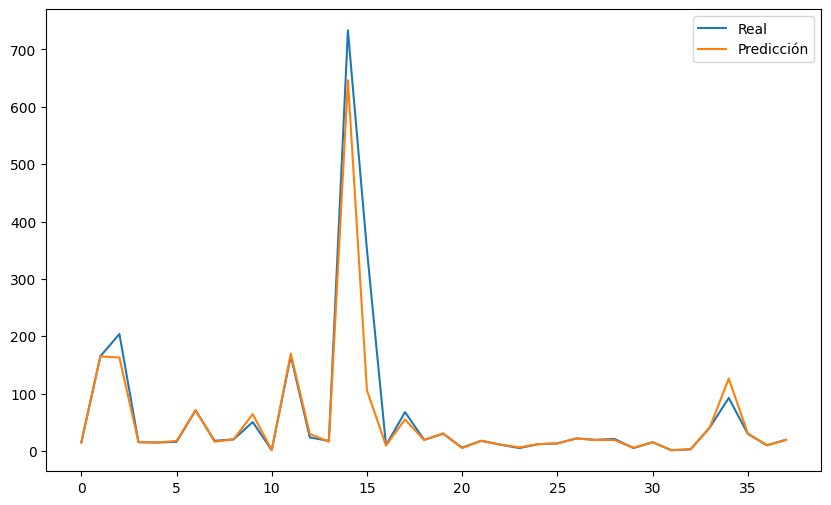

In [14]:

import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv("../short_dataset.csv")

# split data into X and y
X = df[['Year', 'Month', 'Day', 'DayOfWeek', 'Quantity', 'UnitPrice']]
# Etiqueta (target)
y = df['TotalSales']

seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# fit model
model =  XGBRegressor(
  n_estimators=100,     # Número de árboles
  max_depth=3,          # Profundidad máxima
  learning_rate=0.1,    # Tasa de aprendizaje
  min_child_weight=1,   # Peso mínimo necesario para crear un nodo hijo
  subsample=1,          # Fracción de muestras usadas para entrenar
  colsample_bytree=1,   # Fracción de características usadas por árbol
  random_state=42       # Semilla aleatoria
)
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)

print(y_test.values)
print(y_pred)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Predicción')
plt.legend()
plt.show()